# Fundamental

## 1. Những điều cơ bản 
[read here](https://nttuan8.com/bai-5-gioi-thieu-ve-xu-ly-anh/)
- Video là tập hợp các frame và chúng là khung tĩnh. Cho nên xử lý hình ảnh và video là giống nhau.
- Theo dõi hướng sẽ yêu cầu một loạt các ảnh, nhưng phát hiện khuân mặ hay object detection có thể thực hiện gần như chính xác trên hình ảnh và video.


## 2. Background Subtracting(BS)
- Thao tác trích xuất chuyển động (motion detection) từ video là một thủ tục quan trọng. Mục tiêu xử lý là làm sao tách bạch được đâu là vùng chuyển đọng (motion, foreground) đâu là nền (background) trong vùng không gian video. Trong đó BS là môt nhóm các giải pháp có thể giúp giải quyết vấn đề này. 
- Trước tiên xác định background (một hình, tập tham số, một công thức có thể mô tả background) qua từng frame trong series tuần tự các frame của video. Sau đó dựa vào pixel của frame để tính toán sự khác biệt để suy ra foreground.
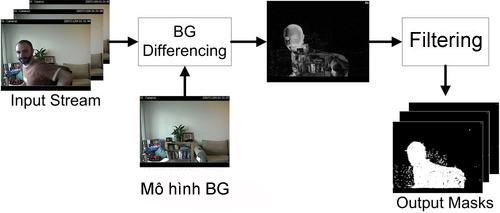

## 3. Color filtering

## 4. Edge detection 

# Transfer learning and data augmentation

# Object detection
- Xác định các bounding box
- xác định đối tượng
Do không biết có bn object trong ảnh nên k thiết kế đc output layer ===> CNN k giải quết đc ==> tạo ra R-CNN 

### R-CNN

1. Mục tieeu

    - Selective Search algorithm lấy 2000 bounding box có object
    - Mỗi bounding xác định đối tg là gì


2. Region proposal

    - Mỗi đối tượng trong ảnh có thể chứa nhiều hơn 1 màu.
    - Các đối tượng bị che mất một phần như cái đĩa dưới cái chén không thể xác định được.
==> cần nhóm các màu vs nhau để làm region proposal

3. Phân loại region proposal
    - RP sẽ đc xác định và resize về cùng kích thước và thực hiện tranfer learning vs feature exactor
    - Cho vào SVM để phân loại.

### Fast R-CNN

1. Mục tiêu
    - Cho vào ConvNet => Conv feature map
    - dùng Selective research để xđ RP đc lấy ra như R-CNN => Flatten + 2FC để dự đoán RP và giá trị offset values
    - Ro RP có size khác nhau và k resize đc => ROI

2. ROI 
    - Cho ra output có cùng kích thước
    

### Faster R-CNN

1. Mục tiêu
    - K dùng Selective research để lấy RP mà thêm 1 mạng CNN gla RPN để tìm RP
    - ẢNh đc cho qua pre-trained model để lấy feature=> sd RPN lấy RP

2. RPN
    - RP đc xđ Anchor bằng 4 gtri (x_center, y_center) , weight, height 
    - Nhiều anchor trồng lên nhau => sd non-maxima suppression

## IoU trong Object Detection

IoU được xử dụng trong bài toán object detection, để đánh giá xem bounding box dự đoán đối tượng khớp với ground truth thật của đối tượng.
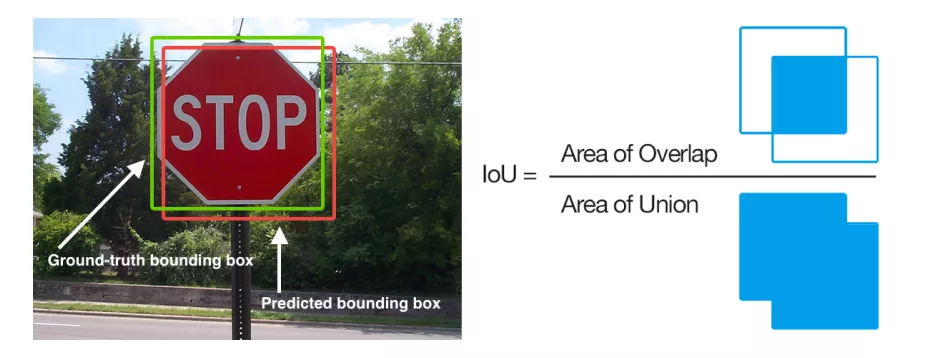


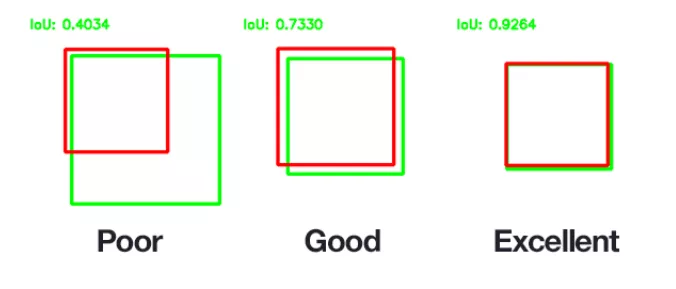

## Non-maxima suppression

Ở trong Region Proposal Network đầu tiên ta có khoảng 9000 anchor box (tập Input) tuy nhiên ta chỉ muốn giữ lại 100 anchor (tập Ouput) làm region proposal. Ta sẽ làm như sau:

- Bước 1: Chọn ra anchor box (A) có xác xuất là foreground lớn nhất trong tập Input
- Bước 2: Thêm A vào tập Ouput.
- Bước 3: Loại bỏ A và các anchor box trong tập Input mà có hệ số IoU với A lớn hơn 0.5 ra khỏi tập Input.
- Bước 4: Kiểm tra nếu tập Input rỗng hoặc tập Output đủ 100 anchor thì dừng lại, nếu không quay lại bước 1.